In [126]:
import pandas as pd
import numpy as np

In [127]:
data = pd.read_csv('iris.csv')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [129]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [130]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [131]:
data['Species'].replace(to_replace = ['setosa', 'versicolor', 'virginica'], value = [0, 1, 2], inplace = True)

In [132]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [133]:
X = data.iloc[:,:-1]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [134]:
Y = data.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=10)

In [137]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
24,4.8,3.4,1.9,0.2
61,5.9,3.0,4.2,1.5
2,4.7,3.2,1.3,0.2
95,5.7,3.0,4.2,1.2
90,5.5,2.6,4.4,1.2
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [138]:
y_train

24     0
61     1
2      0
95     1
90     1
      ..
113    2
64     1
15     0
125    2
9      0
Name: Species, Length: 127, dtype: int64

In [139]:
from sklearn.cluster import KMeans

In [140]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [141]:
y_train.unique()

array([0, 1, 2])

In [142]:
kmeans.labels_

array([0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1,
       0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0], dtype=int32)

In [143]:
kmeans.cluster_centers_

array([[5.00714286, 3.43571429, 1.47142857, 0.24761905],
       [5.91372549, 2.7627451 , 4.38235294, 1.4372549 ],
       [6.87058824, 3.09705882, 5.76176471, 2.07058824]])

In [144]:
predicted = kmeans.predict(X_test)
predicted

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1], dtype=int32)

In [145]:
mean_distance = np.array(kmeans.fit_transform(X_test))
mean_distance

array([[0.68670408, 3.59537463, 1.20729078],
       [1.36347442, 4.50657506, 0.09476071],
       [3.16054782, 0.51644821, 4.39566113],
       [0.58656841, 3.58771776, 0.96086696],
       [3.21582999, 0.09601432, 4.52805315],
       [1.30635466, 2.61996541, 2.60007849],
       [0.88547304, 4.02917098, 0.66470801],
       [0.34505434, 2.98608753, 1.64459535],
       [3.12594986, 0.13863171, 4.4238454 ],
       [0.26751168, 3.39068116, 1.25144814],
       [0.46536276, 3.41126351, 1.24744637],
       [1.03153405, 4.18021755, 0.66578173],
       [0.53062463, 3.04248562, 1.78417076],
       [3.1975088 , 0.4021427 , 4.53656348],
       [3.20804652, 0.437857  , 4.45938588],
       [1.8361815 , 4.85455649, 0.50325471],
       [0.84650015, 3.5198322 , 1.14410646],
       [3.45058872, 0.72402952, 4.81133865],
       [3.14468798, 0.37645551, 4.40199398],
       [3.37847044, 0.28586492, 4.69152514],
       [2.28944589, 5.30723268, 0.94134077],
       [1.74185605, 4.86741397, 0.40582493],
       [0.

In [146]:
np.shape(mean_distance)

(23, 3)

In [147]:
mean_distance.mean(1)

array([1.82978983, 1.98827006, 2.69088572, 1.71171771, 2.61329915,
       2.17546619, 1.85978401, 1.65857908, 2.56280899, 1.636547  ,
       1.70802422, 1.95917778, 1.78576034, 2.71207166, 2.70176313,
       2.39799757, 1.83681294, 2.99531896, 2.64104582, 2.78528683,
       2.84600645, 2.33836498, 1.79856331])

In [159]:
mean_distance.mean()

2.2275365964451828

In [157]:
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    elbow_prediction = kmeans.labels_
    #print(elbow_prediction)
    sse[k] = kmeans.inertia_
print(sse)


{1: 781.3706, 2: 179.05358288770054, 3: 87.22062785114045, 4: 66.81858888888888, 5: 50.277637566137564, 6: 42.919526570048305, 7: 35.656781040215826, 8: 31.24958780350085, 9: 29.43891890717978}


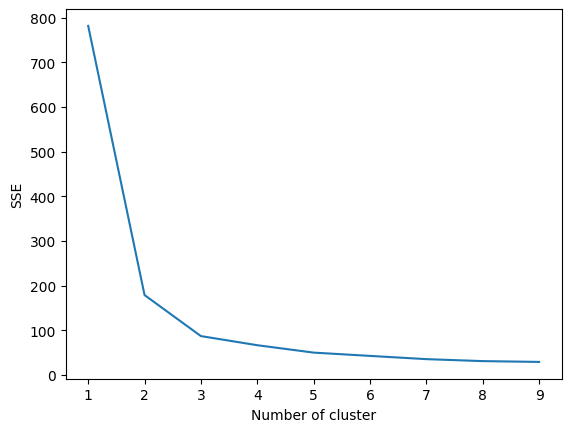

In [158]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

So optimal number of clusters should be around 3.

Can't found Canonical Discriminant Analysis, Linear Discriminant Analysis was avaiable.